** Exercise 3: Corrections from General Relativity and the perihelion precession of Mercury. Due October 4th **

(based on chapter 4.3 in *Computational Physics* by Giordano and Nakanishi)

Newtonian gravity only works for relatively weak gravitational fields, but Einsteins theory of General Relativity (GR) gives a more complete description of gravity. However, when the gravitational field is sufficiently weak and all relevant bodies move with velocities much less than the speed of light, the gravitational force predicted from GR reduces to the familiar "inverse square law" à la Newton. Taking into account the first order correction from GR to the Newtonian gravitational potential, the gravitational potential energy can be written as

$$ V(\vec{r}) = -k \, \frac{m}{r} \left( 1 + \frac{\alpha^2}{3 \, r^2} \right) $$

where $\alpha$ has units of length and typically is very small compared to other distances related to planetary systems ($\alpha$ can be expressed through the speed of light, the eccentricity of orbit, mass of the Sun and similar parameters). 

** Exercise 3.1 ** 
> Compute the gravitational force that arises from this potential. 

(Hint: see what you did in Exercise 1 and change accordingly).

** Answer: ** 

From exercise 1.1 we know that $\vec{F} = - \nabla_{\vec{r}} V(\vec{r}),$ and since the gradient only depends on $\vec{r}$, we simply need to differentiate $V$ with respect to $\vec{r}$. 

$$ V(\vec{r}) = -k \, \frac{m}{r} \left( 1 + \frac{\alpha^2}{3 \, r^2} \right) = -k\frac{m}{r} - k\frac{m\alpha^2}{3r^3} $$

$$ \nabla_{\vec{r}}V(\vec{r}) = k\frac{m}{r^2} + k\frac{m\alpha^2}{r^4} = k\frac{m}{r^2} \left(1 + \frac{\alpha^2}{r^2} \right) $$

The gravitational force is then

$$ \vec{F} = -k\frac{m}{r^2} \left(1 + \frac{\alpha^2}{r^2} \right). $$

** Exercise 3.2 **
> Does Kepler's 2nd law still hold when $\alpha \neq 0$?

** Answer: ** 

Newtons second law says that
$$ \vec{F} = m \, \ddot{\vec{r}} = -k\frac{m}{r^2} $$

and according to our calculation in exercise 3.1 the gravitational force is equal to
$$ \vec{F} = -k\frac{m}{r^2} \left(1 + \frac{\alpha^2}{r^2} \right). $$

But these two forces are not equal to eachother when $\alpha \neq 0$ and therefore Kepler's second law does not either hold when $\alpha \neq 0$. This is due to that Kepler's second law depend on Newton's second law. 

** Exercise 3.3 **

For all planets in our solar system except for Mercury, the corrections from General Relativity can be safely neglected. The effect is also extremely small for Mercury, but it does give a measurable. The effect is known as the *Mercury perihelion shift*, and was one of the first experimental confirmations of General Relativity. After each revolution, the perihelion of the orbit (i.e. the point of closest to the sum) is slightly shifted by an angle $\Delta \theta$. For Mercury, $\alpha^2 \approx 1.1 \times 10^{-8} \mbox{AU}^2$ which gives $\alpha \approx 10^{-4}\mbox{AU} $. As long as the distance between Mercury and the Sun is much larger than $\alpha$, we need not to worry about higher order corrections.  


> Starting from the class Planet you created in Exercise 2, create a class PlanetGR (see outline below - if you wish to use it) in which the constructior takes $\alpha^2$ as an additional argument. Modify the doTimeStep function such that it includes the first order correction from General Relativity. 

** Answer: **

See the code in the end of the file. 

** Exercise 3.4 **

With $\alpha^2 \approx 1.1 \times 10^{-8} \mbox{AU}^2$, we would have to wait way too long until we directly can see the perihelion shift with our program. Instead, we'll study the perhelion shift of Mercury as a function of $\alpha^2$ for larger $\alpha^2$ and then reduce $\alpha^2$ so that we can eventually extrapolate the relation for $\alpha^2 = 1.1 \cdot 10^{-8}\mbox{AU}^2$. 


> In three different figures, plot the orbit of Mercury during 2 Earth years for $\alpha^2 = 0$, $10^{-2}$, $10^{-3}$ and $10^{-4} \mbox{AU}^2$ and indicate in each figure the positions of the perihelion. Use the initial conditios $x=0.47$ AU, $y=0$, $v_x=0$ and $v_y = 8.2 $ AU/year. This will put Mercury in the aphelion (point furthest away from the Sun) at $t=0$. Make sure you choose a sufficiently small step size. If you want, you can use the templated code below. 

>*Hint:* You know that the planet is in it's perihelion when the distance to the Sun at both the previous and the next time step is larger than the current distance.

In [1]:
import matplotlib.pyplot as plt
import math 
import numpy as np

class PlanetGR:
	
	k = 4*math.pi**2
	
	def __init__(self,x,y,vx,vy,alpha2):
		self.x = x
		self.y = y
		self.vx = vx
		self.vy = vy
		self.t = 0
		self.alpha2 = alpha2
		
	def doTimeStep(self,dt):
		self.vx = self.vx + -self.k * self.x / ((self.x **2 + self.y **2)**1.5) * (1+(self.alpha2/(self.x **2 + self.y **2))) * dt #new vx using formula from 2.1
		self.vy = self.vy + -self.k * self.y / ((self.x **2 + self.y **2)**1.5) * (1+(self.alpha2/(self.x **2 + self.y **2))) * dt #corected for GR
		self.x += self.vx * dt #calculates the new coordinates
		self.y += self.vy * dt
		self.t += dt #total time elapsed

	def orbitPlot(self,stepSize,time,findPerihelion = False): #method to simplily ploting
		self.xlist = [self.x]
		self.ylist = [self.y]
		
		while self.t <= time: #time is the total time to simulate
			self.doTimeStep(stepSize) #stepSize is the doTimeStep dt
			if findPerihelion == True:
				#If the possition of the perihelion is requested orbitplot will plot
				#all points that has a radius smaller than both adjacent points.
				if (self.x**2 + self.y**2) > (self.xlist[-1]**2 + self.ylist[-1]**2) and (self.xlist[-1]**2 + self.ylist[-1]**2) < (self.xlist[-2]**2 + self.ylist[-2]**2):
					plt.plot(self.xlist[-1], self.ylist[-1], 'rx')
			self.xlist.append(self.x)
			self.ylist.append(self.y)
			
		#ploting and formatin
		plt.plot(self.xlist,self.ylist)
		plt.plot(0,0,'r*')
		plt.axis('equal')
		plt.legend()
		self.getPeriodAndAxis(stepSize) #Calculates and prints SMA and period for every orbit.
		
	def getPeriodAndAxis(self,dt):
		SMA = (abs(min(self.xlist)) + abs(max(self.xlist)))/2  #Semi Major Axis
		stepnr = 0  #stepcounter starting value
		
		for n in self.ylist:
			stepnr += 1  # stepcounter
			if n < 0:
				break     # When the planet has reached the opposite side of the star, wrt starting positions, break the loop
				
		print('Period is ')
		print(2*stepnr*dt)  #double stepnumber times stepsize is the period
		print('SMA is ')
		print(SMA)
		print('T^2/a^3=')
		print((2*stepnr*dt)**2/SMA**3)   #Numerical aroximation of Keplers third Law

Period is 
0.245274
SMA is 
0.39183263254232414
T^2/a^3=
1.000002812502142


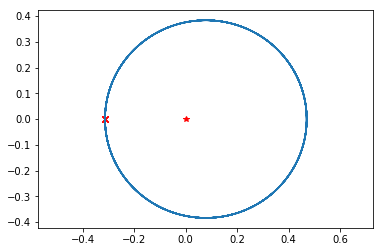

In [8]:
# alpha^2 = 0
mercury1 = PlanetGR(0.47,0,0,8.2,0)
mercury1.orbitPlot(0.000001,2, True)
plt.show()

Period is 
0.22583799999999998
SMA is 
0.46952582458229186
T^2/a^3=
0.49273746626340115


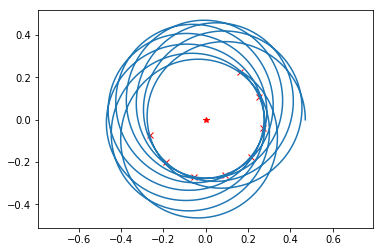

In [9]:
# alpha^2 = 10^-2
mercury2 = PlanetGR(0.47,0,0,8.2,1e-2)
mercury2.orbitPlot(0.000001,2, True)
plt.show()

Period is 
0.243226
SMA is 
0.3917437557053919
T^2/a^3=
0.9840422544528458


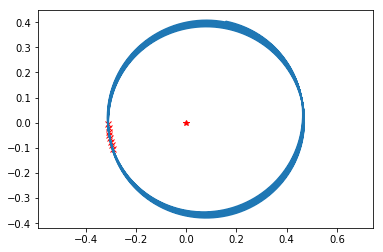

In [10]:
# alpha^2 = 10^-3
mercury3 = PlanetGR(0.47,0,0,8.2,1e-3)
mercury3.orbitPlot(0.000001,2, True)
plt.show()

Period is 
0.24506799999999998
SMA is 
0.39166274116470096
T^2/a^3=
0.9996234500996657


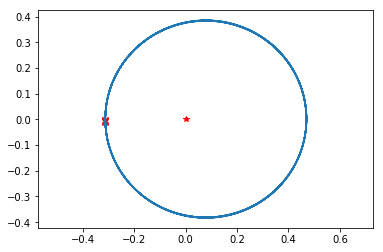

In [11]:
# alpha^2 = 10^-4
mercury4 = PlanetGR(0.47,0,0,8.2,1e-4)
mercury4.orbitPlot(0.000001,2, True)
plt.show()